In [45]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("Solar Power Dataset csv.csv")

# 1 Data Preprocessing

In [46]:
df

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [47]:
# See if there is any missing value

df.isnull().sum()

Day of Year                             0
Year                                    0
Month                                   0
Day                                     0
First Hour of Period                    0
Is Daylight                             0
Distance to Solar Noon                  0
Average Temperature (Day)               0
Average Wind Direction (Day)            0
Average Wind Speed (Day)                0
Sky Cover                               0
Visibility                              0
Relative Humidity                       0
Average Wind Speed (Period)             1
Average Barometric Pressure (Period)    0
Power Generated                         0
dtype: int64

In [48]:
# Find out where the Wind Speed is missing

df.index[df.isnull().any(axis=1)]

Int64Index([714], dtype='int64')

In [49]:
# Locate where the Wind Speed is missing and display the entire row contributes

df.loc[714]

Day of Year                                  334
Year                                        2008
Month                                         11
Day                                           29
First Hour of Period                           7
Is Daylight                                 True
Distance to Solar Noon                  0.406143
Average Temperature (Day)                     57
Average Wind Direction (Day)                  12
Average Wind Speed (Day)                     2.8
Sky Cover                                      2
Visibility                                     4
Relative Humidity                             96
Average Wind Speed (Period)                  NaN
Average Barometric Pressure (Period)       30.16
Power Generated                              159
Name: 714, dtype: object

In [50]:
# Drop the row that has the missing value

df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [51]:
# Check if dropped successfully

df.isnull().values.any()

False

#### Find outliers using the basic 3 standard deviations approach:
Method: Any point outside of 3 standard deviations would be an outlier.    
We find the z score for each of the data point in the dataset and if the z score is greater than 3 than we can classify that point as an outlier. 

In [52]:
# Define the outlier function
def detect_outlier(data):
    outliers = []
    threshold = 3
    mean = np.mean(df[data])
    std = np.std(df[data])
    
    for x in df[data]:
        z_score = (x - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(x)
        return outliers
    
    
# Define the function to display outliers 
def display_outlier(feature):
    outlier_list = detect_outlier(feature)
    if not outlier_list:
        print(feature+" = NO outliers that are above 3 s.d.")
    else:
        print(feature+"'s outliers are'"+" | ".join(outlier_list))
        

# Display the outliers
for x in ["Distance to Solar Noon", 
          "Average Temperature (Day)", 
          "Average Wind Direction (Day)",
          "Average Wind Speed (Day)", 
          "Sky Cover",
          "Visibility",
          "Relative Humidity",
          "Average Wind Speed (Period)",
          "Average Barometric Pressure (Period)",
          "Power Generated"]:
    display_outlier(x)
    


Distance to Solar Noon = NO outliers that are above 3 s.d.
Average Temperature (Day) = NO outliers that are above 3 s.d.
Average Wind Direction (Day) = NO outliers that are above 3 s.d.
Average Wind Speed (Day) = NO outliers that are above 3 s.d.
Sky Cover = NO outliers that are above 3 s.d.
Visibility = NO outliers that are above 3 s.d.
Relative Humidity = NO outliers that are above 3 s.d.
Average Wind Speed (Period) = NO outliers that are above 3 s.d.
Average Barometric Pressure (Period) = NO outliers that are above 3 s.d.
Power Generated = NO outliers that are above 3 s.d.


#### Findings from 3 s.d. methods: 

From the results below, it seems that there are no outliers anywhere
But we still have to do some investigation with empirical knowledge in our context
Emperically, when there is no sunlight, solar power cannot be generated


In [53]:
# Let's see if this is true by calculating the mean value
# We're intersted in the mean value for the Power Generated column when Is Daylight == False

df.groupby("Is Daylight").mean()

,Day of Year,Year,Month,Day,First Hour of Period,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
Is Daylight,,,,,,,,,,,,,,,
False,190.718386,2008.613453,6.766816,15.665471,9.986547,0.816854,57.883408,24.458296,9.728072,1.936323,9.710987,80.052915,8.353363,30.027471,0.000000
True,178.686807,2008.698448,6.374723,15.747228,12.437916,0.309545,58.830931,25.266630,10.329047,2.019401,9.466048,69.459534,11.226718,30.011680,11297.667406


In [54]:
# Since this is true, we can treat all the data where there is no daylight as noise and drop them from the dataframe

df = df[df['Is Daylight'] == True] 
df.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,245,2008,9,1,16,True,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,245,2008,9,1,19,True,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515


In [55]:
# Now, the outliers can be defined as: when there's sunglight, there's still no power generated
# Eliminate these outliers because they are not contributing to our model

df = df[df['Power Generated'] != 0]
df.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
5,245,2008,9,1,16,True,0.296915,69,28,7.5,0,10.0,20,23.0,29.85,16280
6,245,2008,9,1,19,True,0.528278,69,28,7.5,0,10.0,36,15.0,29.83,515


<AxesSubplot:>

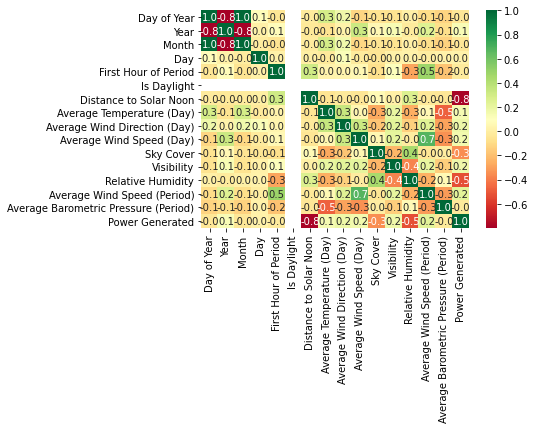

In [56]:
# Find the noise & correlation between features within the dataset

sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='RdYlGn')

#### Findings from the correlation matrix heatmap
Above result indicated that "Day of Year", "Month", "Day", "First Hour of Period", "Average Barometric Pressure (Period)" have no correlation with "Power Generated". Similarily, "Year" should not be related to Solar Power Generation.
Thus, they can be regarded as noise as well.

From the result, we can also find out that "Average Wind Speed (Period)" has a correlation with "Average Wind Speed (Day)". This makes sense since each day is included in a certain period.

To get a more accurate result, we should eliminate "Average Wind Speed (Period)" and use "Average Wind Speed (Day)" instead.

Above result also indicated that "Distance to Solar Noon" and "Relative Humidity" have heavy correlation with "Power Generated". Thus, they shall be treated with more attention during modeling.

In [57]:
# Drop the noise and the features that have no correlation with "Power Generated" 
# We can drop "Is Daylight" as well since all the value is True here.

df_drop = df.drop(["Day of Year", "Month", "Day", "First Hour of Period", 
                   "Average Barometric Pressure (Period)", "Is Daylight", "Year"], axis=1)
df_drop

,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Power Generated
2,0.397172,69,28,7.5,0,10.0,70,0.0,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,30069
5,0.296915,69,28,7.5,0,10.0,20,23.0,16280
6,0.528278,69,28,7.5,0,10.0,36,15.0,515
...,...,...,...,...,...,...,...,...,...
2914,0.396927,63,27,13.9,4,10.0,87,9.0,464
2915,0.166453,63,27,13.9,4,10.0,75,10.0,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,17257


In [58]:
df_drop.shape

(1599, 9)

# 2 Modeling: Ordinary Least Squares (OLS) Regression

In [59]:
import statsmodels.api as sm

In [60]:
# Model 1: all 9 features 
# "Distance to Solar Noon", "Average Temperature (Day)", "Average Wind Direction (Day)", "Average Wind Speed (Day)", "Sky Cover", "Visibility", "Relative Humidity", "Average Wind Speed (Period)"
# (most complex)

X9 = df_drop[["Distance to Solar Noon", "Average Temperature (Day)", "Average Wind Direction (Day)", "Average Wind Speed (Day)", "Sky Cover", "Visibility", "Relative Humidity", "Average Wind Speed (Period)"]]
target = pd.DataFrame(df_drop, columns=["Power Generated"])
y = target["Power Generated"]

model = sm.OLS(y, X9).fit()
predictions = model.predict(X9)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Power Generated   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.876
Method:                 Least Squares   F-statistic:                              1418.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:00:22   Log-Likelihood:                         -16153.
No. Observations:                1599   AIC:                                  3.232e+04
Df Residuals:                    1591   BIC:                                  3.236e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Distance to Solar Noon        -4.89e+04    972.996    -50.255      0.000   -5.08e+04    -4.7e+04
Average Temperature (Day)      225.3952     18.697     12.055      0.000     188.722     262.069
Average Wind Direction (Day)   140.8717     26.581      5.300      0.000      88.735     193.009
Average Wind Speed (Day)         4.3772     45.669      0.096      0.924     -85.200      93.955
Sky Cover                    -1333.0249    129.475    -10.296      0.000   -1586.985   -1079.065
Visibility                    1234.0847     96.179     12.831      0.000    1045.434    1422.736
Relative Humidity              -30.3392     10.589     -2.865      0.004     -51.108      -9.570
Average Wind Speed (Period)    212.1765     27.266      7.782      0.000     158.696     265.657
==============================================================================
Omnibus:                        1.114   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.174
Skew:                           0.041   Prob(JB):                        0.556
Kurtosis:                       2.896   Cond. No.                         634.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 1 summary:    
- Here I used all 9 available variables, resulting in an R^2 of 0.877. 
- Even though the adjusted R^2 is 0.876, I see that the p-value for Average Wind Speed (Day) is high, indicating the feature may not be useful.

In [61]:
# Model 2: two of the most correlated features: 
# "Distance to Solar Noon", "Relative Humidity"
# (most simple)

X2 = df_drop[["Distance to Solar Noon", "Relative Humidity"]]
target = pd.DataFrame(df_drop, columns=["Power Generated"])
y = target["Power Generated"]

model = sm.OLS(y, X2).fit()
predictions = model.predict(X2)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Power Generated   R-squared (uncentered):                   0.582
Model:                            OLS   Adj. R-squared (uncentered):              0.581
Method:                 Least Squares   F-statistic:                              1110.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                   5.94e-303
Time:                        23:04:07   Log-Likelihood:                         -17131.
No. Observations:                1599   AIC:                                  3.427e+04
Df Residuals:                    1597   BIC:                                  3.428e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Distance to Solar Noon -4.013e+04   1750.575    -22.922      0.000   -4.36e+04   -3.67e+04
Relative Humidity        322.0384      8.083     39.841      0.000     306.184     337.893
==============================================================================
Omnibus:                      157.940   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.978
Skew:                           0.029   Prob(JB):                     6.29e-11
Kurtosis:                       2.162   Cond. No.                         452.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2 Summary:     
- The coefficient of "Relative Humidity" changed from -30 to 322
- This might indicate that there is collinearity
- R^2 is a bit smaller than I would like, indicating the model is not complex enough

In [62]:
# Model 3: three of the most correlated features
# "Distance to Solar Noon", "Relative Humidity", "Sky Cover"

X3 = df_drop[["Distance to Solar Noon", "Relative Humidity", "Sky Cover"]]
target = pd.DataFrame(df_drop, columns=["Power Generated"])
y = target["Power Generated"]

model = sm.OLS(y, X3).fit()
predictions = model.predict(X3)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Power Generated   R-squared (uncentered):                   0.611
Model:                            OLS   Adj. R-squared (uncentered):              0.610
Method:                 Least Squares   F-statistic:                              835.1
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:10:02   Log-Likelihood:                         -17074.
No. Observations:                1599   AIC:                                  3.415e+04
Df Residuals:                    1596   BIC:                                  3.417e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Distance to Solar Noon  -4.15e+04   1693.623    -24.506      0.000   -4.48e+04   -3.82e+04
Relative Humidity        399.6018     10.539     37.915      0.000     378.929     420.274
Sky Cover              -2448.4363    223.795    -10.941      0.000   -2887.399   -2009.473
==============================================================================
Omnibus:                      145.666   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.953
Skew:                           0.096   Prob(JB):                     6.37e-11
Kurtosis:                       2.183   Cond. No.                         454.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3 Summary:
- Coefficients of the features here are similar to the ones in Model 2
- R^2 increased

In [63]:
# Model 4: include more features with ≥0.2 correlation

# Additional features compared to Model 3: 
# "Average Wind Direction (Day)", "Average Wind Speed (Day)", "Visibility"

X6 = df_drop[["Distance to Solar Noon", "Relative Humidity", "Sky Cover", 
              "Average Wind Direction (Day)", "Average Wind Speed (Day)", "Visibility"]]
target = pd.DataFrame(df_drop, columns=["Power Generated"])
y = target["Power Generated"]

model = sm.OLS(y, X6).fit()
predictions = model.predict(X6)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Power Generated   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              1623.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:13:44   Log-Likelihood:                         -16260.
No. Observations:                1599   AIC:                                  3.253e+04
Df Residuals:                    1593   BIC:                                  3.256e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Distance to Solar Noon       -4.859e+04   1033.463    -47.017      0.000   -5.06e+04   -4.66e+04
Relative Humidity               -2.5651      9.925     -0.258      0.796     -22.032      16.902
Sky Cover                    -1388.0121    137.754    -10.076      0.000   -1658.210   -1117.814
Average Wind Direction (Day)   282.5302     25.864     10.924      0.000     231.799     333.262
Average Wind Speed (Day)       198.2793     35.807      5.538      0.000     128.046     268.512
Visibility                    2086.7526     77.581     26.898      0.000    1934.582    2238.923
==============================================================================
Omnibus:                        5.410   Durbin-Watson:                   1.412
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                5.309
Skew:                           0.132   Prob(JB):                       0.0703
Kurtosis:                       3.102   Cond. No.                         496.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 4 Summary
- The coefficient of "Relative Humidity" changes greatly
- This indicates that "Relative Humidity" may have collinearity with one or more of the additional features in Model 4
- Empirically speaking, humidity is related to wind speed and wind direction; but wind speed and wind direction is not so related to solar power generation, we can try getting rid of these two features

In [64]:
# Model 5:
# "Distance to Solar Noon", "Relative Humidity", "Sky Cover", "Visibility"

X4 = df_drop[["Distance to Solar Noon", "Relative Humidity", "Sky Cover", "Visibility"]]
target = pd.DataFrame(df_drop, columns=["Power Generated"])
y = target["Power Generated"]

model = sm.OLS(y, X4).fit()
predictions = model.predict(X4)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Power Generated   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              2112.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:20:33   Log-Likelihood:                         -16357.
No. Observations:                1599   AIC:                                  3.272e+04
Df Residuals:                    1595   BIC:                                  3.274e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Distance to Solar Noon -4.942e+04   1094.688    -45.146      0.000   -5.16e+04   -4.73e+04
Relative Humidity         31.8183     10.189      3.123      0.002      11.832      51.804
Sky Cover              -1500.2909    144.360    -10.393      0.000   -1783.445   -1217.137
Visibility              2855.7852     59.372     48.100      0.000    2739.329    2972.241
==============================================================================
Omnibus:                        3.577   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                4.002
Skew:                          -0.004   Prob(JB):                        0.135
Kurtosis:                       3.245   Cond. No.                         463.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5 Summary:
- The coefficient of "Relative Humidity" still changes greatly

## Additional research: 
- Article: How Do Wind and Humidity Affect Solar Panel Efficiency?
- URL: https://www.solar.com/learn/how-do-wind-and-humidity-affect-solar-panel-efficiency/
- Wind can cool down solar panels and cooler panels can generate more power. 
- Tiny water droplets, or water vapor, can collect on solar panels (like beads of sweat) and reflect or refract sunlight away from solar cells. This reduces the amount of sunlight hitting them and producing electricity. 

#### Research conclusion:
- Wind speed is important, but wind direction may be redundant
- Humidity is important, and should have negative coefficient; this is also proven in the correlation matrix, which indicates -0.5 correlation between humidity and power generation


In [65]:
# Model 6: new model according to the research findings above

X5 = df_drop[["Distance to Solar Noon", "Relative Humidity", "Sky Cover", 
              "Visibility", "Average Wind Speed (Day)"]]
target = pd.DataFrame(df_drop, columns=["Power Generated"])
y = target["Power Generated"]

model = sm.OLS(y, X5).fit()
predictions = model.predict(X5)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Power Generated   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              1791.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:26:34   Log-Likelihood:                         -16317.
No. Observations:                1599   AIC:                                  3.264e+04
Df Residuals:                    1594   BIC:                                  3.267e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Distance to Solar Noon   -4.873e+04   1071.056    -45.495      0.000   -5.08e+04   -4.66e+04
Relative Humidity           23.3965      9.987      2.343      0.019       3.807      42.986
Sky Cover                -1601.7802    141.327    -11.334      0.000   -1878.987   -1324.573
Visibility                2567.5384     66.216     38.775      0.000    2437.659    2697.418
Average Wind Speed (Day)   317.7653     35.338      8.992      0.000     248.452     387.079
==============================================================================
Omnibus:                        3.073   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                3.147
Skew:                           0.056   Prob(JB):                        0.207
Kurtosis:                       3.187   Cond. No.                         469.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 6 Summary:
- The coefficients of "Relative Humidity" is still positive, and it's a small value
- In Model 5, the coefficient of "Relative Humidity" is also a small and positive value, indicating that the added feature "Average Wind Speed (Day)" is not the problem
- I took another look at the heatmap and found out that the correlation between "Relative Humidity" and "Distance to Solar Noon" is 0.3
- This makes sense because noon time is usually is least humid time of the day
- So, I decided to get rid of "Distance to Solar Noon"

In [67]:
# Model 7:
# "Relative Humidity", "Sky Cover", "Visibility", "Average Wind Speed (Day)"

X6 = df_drop[["Relative Humidity", "Sky Cover", 
              "Visibility", "Average Wind Speed (Day)"]]
target = pd.DataFrame(df_drop, columns=["Power Generated"])
y = target["Power Generated"]

model = sm.OLS(y, X6).fit()
predictions = model.predict(X6)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Power Generated   R-squared (uncentered):                   0.653
Model:                            OLS   Adj. R-squared (uncentered):              0.652
Method:                 Least Squares   F-statistic:                              749.2
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        23:34:13   Log-Likelihood:                         -16983.
No. Observations:                1599   AIC:                                  3.397e+04
Df Residuals:                    1595   BIC:                                  3.400e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Relative Humidity         -134.4875     14.194     -9.475      0.000    -162.328    -106.647
Sky Cover                -1304.5691    213.966     -6.097      0.000   -1724.253    -884.885
Visibility                2067.1388     98.962     20.888      0.000    1873.029    2261.248
Average Wind Speed (Day)   433.6164     53.418      8.117      0.000     328.839     538.394
==============================================================================
Omnibus:                      377.218   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.406
Skew:                           0.200   Prob(JB):                     9.43e-18
Kurtosis:                       1.992   Cond. No.                         62.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 7 Summary 
- The final model incorporates 4 independent variables and a relatively high R-Squared of 0.65, which indicates that approximately 65% of the observed variation can be explained by the model's inputs. 
- This is a good estimation because we don’t want an R-squared so high that causes bias in the model. 
- We also don’t need one because we are not making precise prediction. Instead, we want to see which features are the most influential.

<br />


The coefficients are reasonable as well. 
- “Relative Humidity” has a negative coefficient because water vapor can reflect sunlight away from solar panels and leads to a lesser production of electricity.
- “Wind Speed” has a positive coefficient because wind can lower the temperature of solar panels, translating to greater power generation. 
- “Sky Cover” and “Visibility” are straightforward as they are directly related to how much sunlight is hitting the panels. 

<br />


The result indicates that, the most influential condition is “Visibility”, then “Sky Cover”, and then “Wind Speed”, and at last, “Humidity”.


# 3 Business Problem and Value Extraction

#### Problem:
- Solar panel companies are facing problems. The key marketing message, that you can get profit without investment, is starting to get old and boring, which results in high sale cost and low conversion rate. The average cost per sale for solar panel in California is $1,929 with an average of 7% conversion rate.      
- To solve this problem, I propose that solar companies need to better locate the target audience and deliver a stronger marketing message. To accomplish these goals, I have conducted a Solar Panel Power Generation Analysis.


#### Objective:
- So, I conducted this research with 3 objectives in mind:
- First and foremost, I need to find out what features, or condition, affect the solar power generation the greatest by building a model. 
- Secondly, with the fitted model, I want to help solar companies locate the best beachhead market. 
- At the same time, the model can help these companies and related lead generation companies build a more convincing marketing message that evolves around dig data; which ultimately increase the channel sales performance for solar companies.

#### Data Preparation:
- For this project, the first step is data preparation. 
- There are 16 columns and 2920 rows. I first found out all the missing values in the data and replaced them cross-sectional mean. 
- Then I handled the outliers, which are the dates that have no power generation even though there “is daylight”. 
- The last one is noise, here I used a heatmap to eliminate any features that have absolutely no correlation with power generation, such as year, month, and day. 
- This also serves as a starting point of the regression model.

#### Regression Model:
- With purged data, I was able to build and adjust the regression model. 
- The final model incorporates 4 independent variables and a relatively high R-Squared of 0.65, which indicates that approximately 65% of the observed variation can be explained by the model's inputs, which indicates approximately 65% of the observed variation can be explained by the model's inputs. This is a good estimation because we don’t want an R-squared so high that causes biases in the model, we also don’t need one because we are not making precise prediction. Instead, we want to see which features are more influential.
- The coefficients are very reasonable as well. “Relative Humidity” has a negative coefficient because water vapor can reflect or refract sunlight away from solar cells and thus reduce the amount of sunlight hitting them; this ultimately leads to a lesser production of electricity.
- “Wind Speed” has a positive coefficient because wind can lower the temperature of solar panels, translating to greater power generation. “Sky Cover” and “Visibility” are straightforward as they are directly related to how much sunlight is shed on them.

#### Value Extraction:
- With the data and the fitted model in hand, there are many ways to utilize them and achieve our end goal. 
- One way that I would suggest is solar companies can go to NOAA and download historical weather data that incorporate these four features, then matched the location with the ideal condition for solar panels to have the highest operation efficiency in order to find a beachhead market. 
- When entering these markets, the model and related prediction can act as a powerful resource for them to generate a strong and convincing marketing message. 
- I believe my research can ultimately help solar companies increase sales and further generate revenue